In [11]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import f1_score,confusion_matrix,make_scorer
from sklearn.model_selection import cross_val_predict

In [12]:
data=pd.read_csv('E:/Ramya/brushUps/Basics/ML using sklearn/Projects/Wine_quality/data/winequality-red.csv',delimiter=';')
X=data.iloc[:,0:11]
y=data.iloc[:,11]

In [13]:
col_names=X.columns
scaler=preprocessing.MinMaxScaler()
normalized_list=scaler.fit_transform(X)
X=pd.DataFrame(normalized_list,columns=col_names)

In [14]:
y=pd.cut(y,bins=3,labels=['poor','normal','excellent'])
label_map={'poor':0,'normal':1,'excellent':2}
y=y.map(label_map)
y=np.array(y)
data['quality']=y

In [15]:
from sklearn.pipeline import make_pipeline

In [16]:
clf_pipeline=make_pipeline(SVC(C=1000, gamma= 0.1, kernel= 'rbf',class_weight='balanced'))

In [17]:
y_pred=cross_val_predict(clf_pipeline,X,y,cv=10)
print('f1_score: '+str(round(f1_score(y,y_pred,average='weighted'),4)))

f1_score: 0.798


In [ ]:
#variance based feature selection

In [19]:
var_matrix=data.var()

In [20]:
var_matrix

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.165938
dtype: float64

In [21]:
low_variance_features=var_matrix[var_matrix<0.01].index.to_list()

In [22]:
low_variance_features

['chlorides', 'density']

In [39]:
# X=X.drop(columns=low_variance_features)

In [40]:
# y_pred=cross_val_predict(clf_pipeline,X,y,cv=10)
# print('f1_score: '+str(round(f1_score(y,y_pred,average='weighted'),4)))

In [23]:
low_variance_features=var_matrix[var_matrix<0.001].index.to_list()

In [24]:
low_variance_features

['density']

In [25]:
X=X.drop(columns=low_variance_features)

In [26]:
y_pred=cross_val_predict(clf_pipeline,X,y,cv=10)
print('f1_score: '+str(round(f1_score(y,y_pred,average='weighted'),4)))

f1_score: 0.7978


In [ ]:
#correlation based feature selection

In [18]:
corr_matrix=data.drop(columns=low_variance_features).corr(method='kendall')

NameError: name 'low_variance_features' is not defined

In [46]:
corr_matrix[corr_matrix>0.8]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
fixed acidity,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile acidity,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [34]:
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

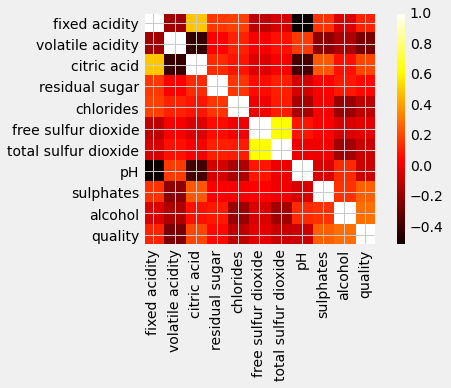

In [48]:
corr_cols=corr_matrix.columns.to_list()
corr_heat_map=plt.imshow(corr_matrix,cmap='hot',interpolation='nearest')
plt.xticks(range(len(corr_cols)),corr_cols,rotation=90)
plt.yticks(range(len(corr_cols)),corr_cols)
plt.colorbar(corr_heat_map)

In [49]:
corr_quality=abs(corr_matrix['quality']).drop('quality')

In [50]:
corr_quality.sort_values(ascending=False)

alcohol                 0.280552
volatile acidity        0.266013
sulphates               0.247974
citric acid             0.190271
chlorides               0.112666
fixed acidity           0.107857
total sulfur dioxide    0.089195
pH                      0.081382
residual sugar          0.045746
free sulfur dioxide     0.030997
Name: quality, dtype: float64

In [51]:
corr_quality[corr_quality>0.1].index.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'sulphates',
 'alcohol']

In [52]:
corr_threshold=[0.1,0.2]

In [53]:
for val in corr_threshold:
    features_list=corr_quality[corr_quality>val].index.to_list()
    X_features=X[features_list]
    y_pred=cross_val_predict(clf_pipeline,X_features,y,cv=10)
    print(features_list)
    print('f1_score: '+str(round(f1_score(y,y_pred,average='weighted'),2)))

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'sulphates', 'alcohol']
f1_score: 0.78
['volatile acidity', 'sulphates', 'alcohol']
f1_score: 0.76


In [ ]:
#sequential feature selection

In [27]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [28]:
f1=make_scorer(f1_score,average='weighted')
k=X.shape[1]
sfs=SFS(clf_pipeline,k_features=k,forward=True,scoring=f1,cv=10)

In [56]:
sfs=sfs.fit(X,y)

In [57]:
sfs.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.74589041, 0.74589041, 0.74589041, 0.74589041, 0.74589041,
         0.74589041, 0.74589041, 0.74589041, 0.74589041, 0.74435047]),
  'avg_score': 0.7457364164906433,
  'feature_names': ('fixed acidity',)},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.74589041, 0.74589041, 0.74589041, 0.74589041, 0.74589041,
         0.74589041, 0.74589041, 0.74589041, 0.74589041, 0.74435047]),
  'avg_score': 0.7457364164906433,
  'feature_names': ('fixed acidity', 'volatile acidity')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.74589041, 0.74589041, 0.74589041, 0.74589041, 0.74589041,
         0.74589041, 0.74589041, 0.74589041, 0.74589041, 0.74435047]),
  'avg_score': 0.7457364164906433,
  'feature_names': ('fixed acidity', 'volatile acidity', 'citric acid')},
 4: {'feature_idx': (0, 1, 2, 9),
  'cv_scores': array([0.74589041, 0.74589041, 0.74589041, 0.74589041, 0.74589041,
         0.74589041, 0.77576502, 0.74589041, 0.74589041, 0.744

In [58]:
sfs_bward=SFS(clf_pipeline,k_features=1,forward=False,scoring=f1,cv=10)

In [59]:
sfs_bward=sfs_bward.fit(X,y)
sfs_bward.subsets_

{10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.76594551, 0.77369505, 0.83884439, 0.80016129, 0.76992388,
         0.82046703, 0.76744737, 0.82381494, 0.80407468, 0.79262447]),
  'avg_score': 0.7956998607119621,
  'feature_names': ('fixed acidity',
   'volatile acidity',
   'citric acid',
   'residual sugar',
   'chlorides',
   'free sulfur dioxide',
   'total sulfur dioxide',
   'pH',
   'sulphates',
   'alcohol')},
 9: {'feature_idx': (0, 1, 2, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.77794232, 0.76992388, 0.85415602, 0.80049867, 0.75367287,
         0.80981094, 0.76301235, 0.82127698, 0.80407468, 0.79262447]),
  'avg_score': 0.7946993166814782,
  'feature_names': ('fixed acidity',
   'volatile acidity',
   'citric acid',
   'chlorides',
   'free sulfur dioxide',
   'total sulfur dioxide',
   'pH',
   'sulphates',
   'alcohol')},
 8: {'feature_idx': (1, 2, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.77794232, 0.7822516 , 0.83082252, 0.80534595, 0.7427835

In [60]:
len_features_b,avg_score_b=[],[]
for key,value in sfs_bward.subsets_.items():
    len_features_b.append(len(value['feature_idx']))
    avg_score_b.append(round(value['avg_score'],4))

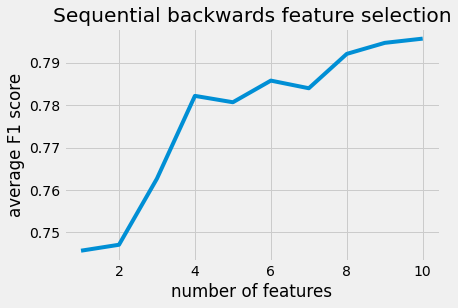

In [69]:
plt.plot(len_features_b,avg_score_b)
plt.xlabel('number of features')
plt.ylabel('average F1 score')
plt.title('Sequential backwards feature selection')
plt.show()

In [70]:
# using decision tree to get feature importance

In [31]:
from sklearn.tree import DecisionTreeClassifier 
dtreeclf=DecisionTreeClassifier(criterion='entropy',max_depth=14.0,min_samples_split=0.2,min_samples_leaf=0.1,max_features=9,class_weight='balanced')
dtreeclf.fit(X,y)   

DecisionTreeClassifier(criterion='entropy', max_depth=14.0, max_features=9,
                       min_samples_leaf=0.1, min_samples_split=0.2)

In [32]:
importance=dtreeclf.feature_importances_

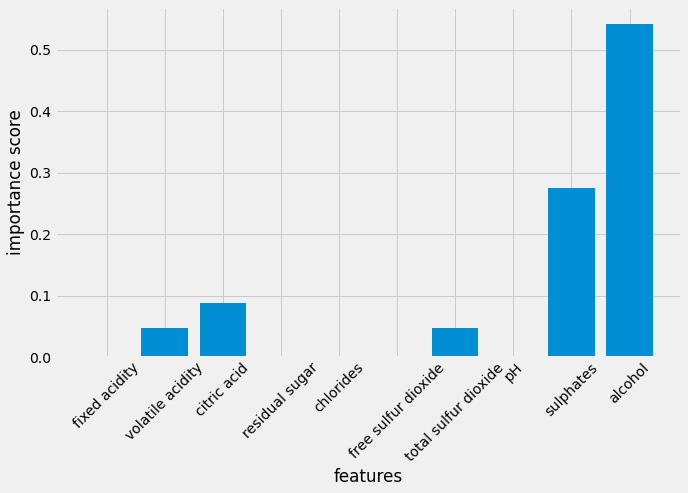

In [35]:
plt.figure(figsize=(10,6))
plt.bar(list(X.columns),list(importance))
plt.xlabel('features')
plt.ylabel('importance score')
plt.xticks(rotation=45)
plt.show()

In [36]:
important_features=list(X.columns[importance>0])[::-1]

In [37]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [38]:
X=X[important_features]

In [39]:
k=X.shape[1]
sfs=SFS(clf_pipeline,k_features=k,forward=True,scoring=f1,cv=10)
sfs=sfs.fit(X,y)
sfs.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.74589041, 0.74589041, 0.74589041, 0.74589041, 0.74589041,
         0.74589041, 0.74589041, 0.74589041, 0.74589041, 0.74435047]),
  'avg_score': 0.7457364164906433,
  'feature_names': ('alcohol',)},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.76594551, 0.74589041, 0.74589041, 0.74589041, 0.74589041,
         0.74589041, 0.73965517, 0.74589041, 0.74589041, 0.74435047]),
  'avg_score': 0.747118402822293,
  'feature_names': ('alcohol', 'sulphates')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.77794232, 0.74589041, 0.78928571, 0.77794232, 0.74278351,
         0.76041013, 0.76979888, 0.78202083, 0.76979888, 0.78092976]),
  'avg_score': 0.7696802736920908,
  'feature_names': ('alcohol', 'sulphates', 'total sulfur dioxide')},
 4: {'feature_idx': (0, 1, 2, 4),
  'cv_scores': array([0.76594551, 0.77395115, 0.79530516, 0.80004537, 0.74278351,
         0.76041013, 0.76917763, 0.78202083, 0.78644572, 0.79262447]),
  'avg_score': 

In [40]:
sfs_bward=SFS(clf_pipeline,k_features=1,forward=False,scoring=f1,cv=10)
sfs_bward=sfs_bward.fit(X,y)
sfs_bward.subsets_

{5: {'feature_idx': (0, 1, 2, 3, 4),
  'cv_scores': array([0.76594551, 0.77395115, 0.78032864, 0.79530516, 0.74278351,
         0.76041013, 0.80462014, 0.78202083, 0.78644572, 0.78092976]),
  'avg_score': 0.77727405549349,
  'feature_names': ('alcohol',
   'sulphates',
   'total sulfur dioxide',
   'citric acid',
   'volatile acidity')},
 4: {'feature_idx': (0, 1, 2, 4),
  'cv_scores': array([0.76594551, 0.77395115, 0.79530516, 0.80004537, 0.74278351,
         0.76041013, 0.76917763, 0.78202083, 0.78644572, 0.79262447]),
  'avg_score': 0.7768709484890991,
  'feature_names': ('alcohol',
   'sulphates',
   'total sulfur dioxide',
   'volatile acidity')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.77794232, 0.74589041, 0.78928571, 0.77794232, 0.74278351,
         0.76041013, 0.76979888, 0.78202083, 0.76979888, 0.78092976]),
  'avg_score': 0.7696802736920908,
  'feature_names': ('alcohol', 'sulphates', 'total sulfur dioxide')},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([

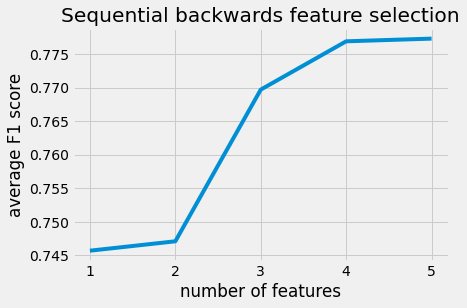

In [41]:
len_features_b,avg_score_b=[],[]
for key,value in sfs_bward.subsets_.items():
    len_features_b.append(len(value['feature_idx']))
    avg_score_b.append(round(value['avg_score'],4))
plt.plot(len_features_b,avg_score_b)
plt.xlabel('number of features')
plt.ylabel('average F1 score')
plt.title('Sequential backwards feature selection')
plt.show()